In [1]:
import numpy as np
import cv2
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from imagededup.methods import PHash, DHash, WHash, AHash, CNN
from skimage import metrics


In [2]:
# Load the five images


img1 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/git repo/AMPLab/ethnonmusicology/assets/pitch_class_scatter/nawba1_scatter.png', 0)
img2 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/git repo/AMPLab/ethnonmusicology/assets/pitch_class_scatter/nawba2_scatter.png', 0)
img3 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/git repo/AMPLab/ethnonmusicology/assets/pitch_class_scatter/nawba3_scatter.png', 0)
img4 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/git repo/AMPLab/ethnonmusicology/assets/pitch_class_scatter/nawba4_scatter.png', 0)
img5 = cv2.imread(
    '/Users/abhishekchoubey/SMC master/2nd timester/AMP lab/git repo/AMPLab/ethnonmusicology/assets/pitch_class_scatter/nawba5_scatter.png', 0)



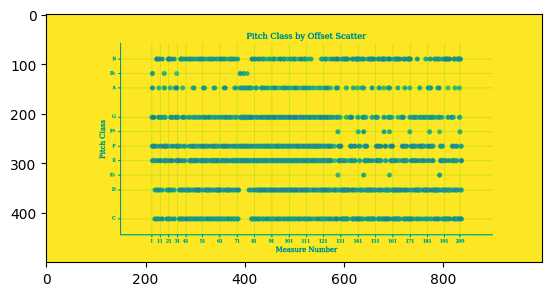

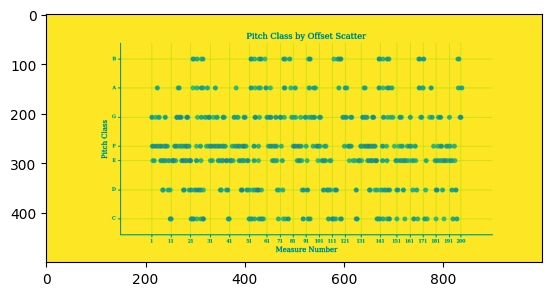

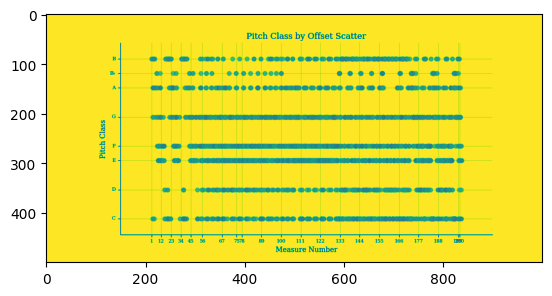

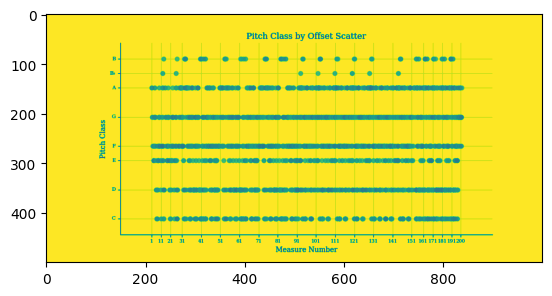

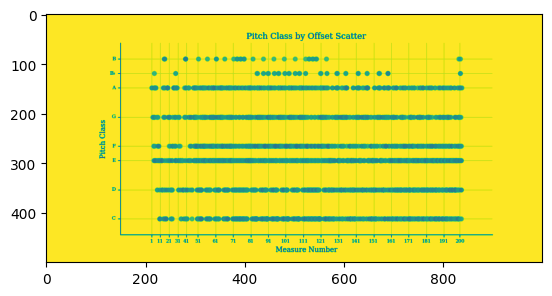

In [3]:
images = [img1, img2, img3, img4, img5]
for i in images:
    imgplot = plt.imshow(i)
    plt.show()


In [4]:

# Convert images to binary arrays
bin_imgs = [cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)[1]
            for img in [img1, img2, img3, img4, img5]]

# Flatten binary arrays to 1D vectors
vec_imgs = [img.flatten() for img in bin_imgs]

# Compute cosine similarity between all pairs of images
combinations = list(combinations(range(5), 2))
cos_similarities = cosine_similarity(vec_imgs)




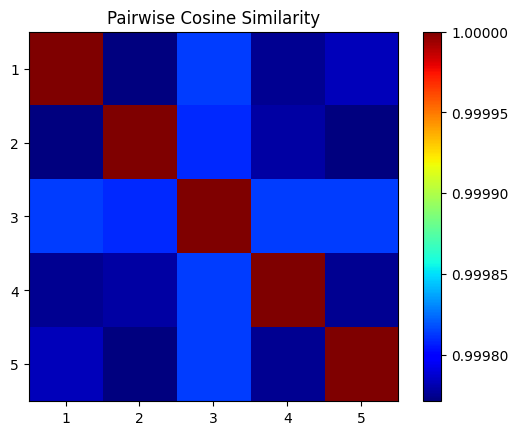

In [5]:
# Plot the cosine similarity matrix
plt.imshow(cos_similarities, cmap='jet')
plt.colorbar()
plt.xticks(range(5), ['1', '2', '3', '4', '5'])
plt.yticks(range(5), ['1', '2', '3', '4', '5'])
plt.title('Pairwise Cosine Similarity')
plt.show()


In [ ]:
# from imagededup.methods import PHash, DHash, WHash, AHash, CNN


# hashers = [PHash(), DHash(), WHash(), AHash()]
# fe = CNN()

# hashes1 = [hasher.hash_image(img1) for hasher in hashers]
# hashes2 = [hasher.hash_image(img2) for hasher in hashers]
# # hashes3 = [hasher.hash_image(img3) for hasher in hashers]
# # hashes4 = [hasher.hash_image(img4) for hasher in hashers]
# # hashes5 = [hasher.hash_image(img5) for hasher in hashers]


# features1 = fe.extract_features(img1)
# features2 = fe.extract_features(img2)
# # features3 = fe.extract_features(img3)
# # features4 = fe.extract_features(img4)
# # features5 = fe.extract_features(img5)

# # Compute the similarity between the images using multiple distance measures
# similarity_scores = {}
# for hasher in hashers:
#     similarity_scores[hasher.__class__.__name__] = hasher.normalized_distance(
#         hashes1[hashers.index(hasher)], hashes2[hashers.index(hasher)])

# similarity_scores['CNN'] = cosine_similarity(
#     features1.reshape(1, -1), features2.reshape(1, -1))[0][0]

# print(similarity_scores)


In [6]:
images = [img1, img2, img3, img4, img5]

ssim_scores = np.zeros((5, 5))
nrmse_scores = np.zeros((5, 5))
psnr_scores = np.zeros((5, 5))
mssim_scores = np.zeros((5, 5))
for i in range(len(images)):
    for j in range(i+1, len(images)):
        # Compute the similarity scores using four different metrics
        ssim = metrics.structural_similarity(images[i], images[j])
        ssim_scores[i, j] = ssim
        ssim_scores[j, i] = ssim
        nrmse = metrics.normalized_root_mse(images[i], images[j])
        nrmse_scores[i, j] = nrmse
        nrmse_scores[j, i] = nrmse
        psnr = metrics.peak_signal_noise_ratio(images[i], images[j])
        psnr_scores[i, j] = psnr
        psnr_scores[j, i] = psnr
        mssim = metrics.mean_squared_error(images[i], images[j])
        mssim_scores[i, j] = mssim
        mssim_scores[j, i] = mssim

# Set the diagonal elements of scores to 1
np.fill_diagonal(ssim_scores, 1)
np.fill_diagonal(nrmse_scores, 1)
np.fill_diagonal(psnr_scores, 1)
np.fill_diagonal(mssim_scores, 1)


#scale all the scores
min_score_ssim = np.min(ssim_scores)
max_score_ssim = np.max(ssim_scores)
scaled_ssim_scores = (ssim_scores - min_score_ssim) / \
    (max_score_ssim - min_score_ssim)


min_score_nrmse = np.min(nrmse_scores)
max_score_nrmse = np.max(nrmse_scores)
scaled_nrmse_scores = (nrmse_scores - min_score_nrmse) / \
    (max_score_nrmse - min_score_nrmse)


min_score_psnr = np.min(psnr_scores)
max_score_psnr = np.max(psnr_scores)
scaled_psnr_scores = (psnr_scores - min_score_psnr) / \
    (max_score_psnr - min_score_psnr)

min_score_mssim = np.min(mssim_scores)
max_score_mssim = np.max(mssim_scores)
scaled_mssim_scores = (mssim_scores - min_score_mssim) / \
    (max_score_mssim - min_score_mssim)


print(type(scaled_nrmse_scores))


[[1.         0.03645492 0.00855001 0.01308845 0.0095219 ]
 [0.03645492 1.         0.03644072 0.02961393 0.03343152]
 [0.00855001 0.03644072 1.         0.01119453 0.00787175]
 [0.01308845 0.02961393 0.01119453 1.         0.        ]
 [0.0095219  0.03343152 0.00787175 0.         1.        ]]


In [9]:
print(type(scaled_nrmse_scores))

print(scaled_nrmse_scores.var())


<class 'numpy.ndarray'>
0.1542347300039025


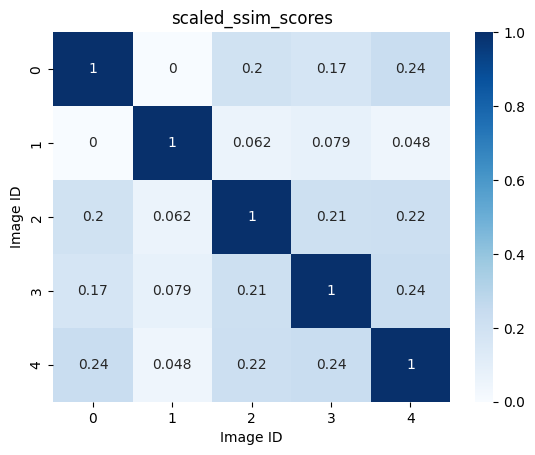

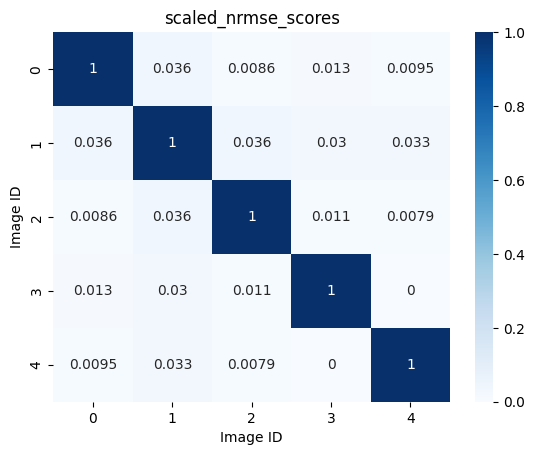

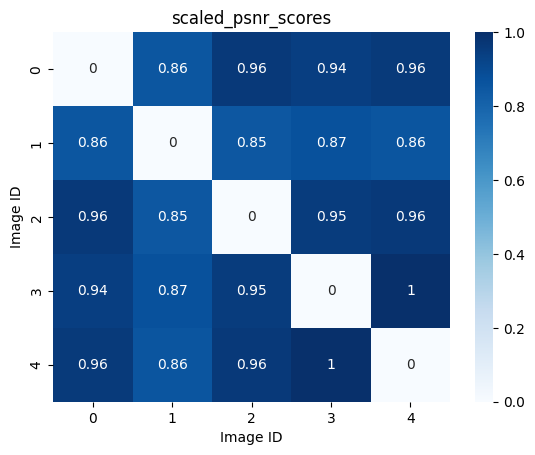

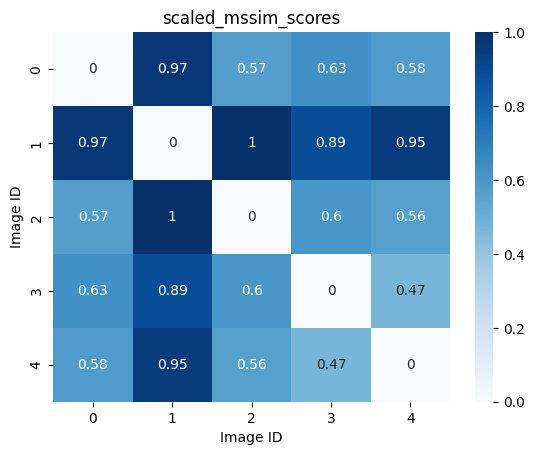

In [7]:
# Display the SSIM scores
scores_list = [scaled_ssim_scores, scaled_nrmse_scores, scaled_psnr_scores, scaled_mssim_scores]
scores_list_name = ["scaled_ssim_scores", "scaled_nrmse_scores",
               "scaled_psnr_scores", "scaled_mssim_scores"]


for i in range(0, len(scores_list)):
# Create a heatmap using seaborn
    sns.heatmap(scores_list[i], annot=True, cmap='Blues')
    # Set the title and axis labels
    plt.title(scores_list_name[i])
    plt.xlabel('Image ID')
    plt.ylabel('Image ID')
    # Show the plot
    plt.show()
